# Milestone 1 Assignment - Capstone Proposal

## Author - Naris Silpakit

### Capstone Project Instructions
Select a problem and data sets of particular interest and apply the analytics process to find and report on a solution.

Students will construct a simple dashboard to allow a non-technical user to explore their solution. The data should be read from a suitable persistent data storage, such as an Internet URL or a SQL data base.

The process followed by the students and the grading criteria include:
<ol style="list-style-type: lower-alpha;">
<li>Understand the business problem <span class="label" style="border-radius: 3px; background-color: darkcyan; color: white;">Milestone 1</span></li>
<li>Evaluate and explore the available data <span class="label" style="border-radius: 3px; background-color: darkcyan; color: white;">Milestone 1</span></li>
<li>Proper data preparation <span class="label" style="border-radius: 3px; background-color: darkcyan; color: white;">Milestone 1</span> <span class="label" style="border-radius: 3px; background-color: royalblue; color: white;">Milestone 2</span></li>
<li>Exploration of data and understand relationships <span class="label" style="border-radius: 3px; background-color: darkcyan; color: white;">Milestone 1</span> <span class="label" style="border-radius: 3px; background-color: royalblue; color: white;">Milestone 2</span></li>
<li>Perform basic analytics and machine learning, within the scope of the course, on the data.  <span class="label" style="border-radius: 3px; background-color: royalblue; color: white;">Milestone 2</span> <span class="label" style="border-radius: 3px; background-color: slateblue; color: white;">Milestone 3</span> <BR/>For example, classification to predict which employees are most likely to leave the company.</li>
<li>Create a written and/or oral report on the results suitable for a non-technical audience. <span class="label" style="border-radius: 3px; background-color: slateblue; color: white;">Milestone 3</span></li>
</ol>




## Tasks
For this proposal, you are to:
1. Generate or describe a solvable business problem and outline the flow of data needed to address the problem.
2. Identify 2 or more available data sets
3. Report on the statistics of each data set to include: type, unique values, missing values, quantile statistics, descriptive statistics, most frequent values, and histogram. Include analysis statements based on results.
4. Perform data preparation based on analysis of the quality of the available data include concatenation method, imputation method(s), dealing with outliers, and binning/scaling transformation.
5. Output the resulting data into a new data file
6. Identify potential machine learning model(s)


## Problem Definition



Business problem: Our capstone group wants to be able to predict a presidential election outcome for states based on historical data (i.e. Which party will a state vote for?).

We have a main dataset recording presidential election outcomes (described below) among other indicators. Our team plans to use a variety of data sources in concert with this data - Each team member is in charge of preparing, exploring, and analyzing their own set of data along with the main dataset (such as workforce and economic data by state). I will be looking at a variety of education spending factors per state, focusing on expenditure per pupil. I believe the plan for the future milestones is to combine our cleaned datasets and conduct further feature engineering and experimentation.

## Data Sets

# Datasets location

__Education Spending per student, 2016 dollars, by state, 2007-2016, (Pre-K through 12)__:
- http://www.governing.com/gov-data/education-data/state-education-spending-per-pupil-data.html
- Data gathered from the 2016 Annual Survey of School System Finances, U.S. Census Bureau


__National Public Education Financial Survey Data (Pre-K through 12)__:
- https://nces.ed.gov/ccd/stfis.asp
- Each year is a separate dataset.
- Only use more recent datasets with per-pupil expenditure records since older surveys don't collect the same data that the more recent datasets contain.
- Codebooks for each survey year included in table on webpage.

In [86]:
# Import libraries
import pandas as pd
import numpy as np
import glob
import seaborn as sns
import matplotlib.pyplot as plt
# cpi provides convenience functions for inflation adjustment
import cpi
from scipy.stats import mstats
from sklearn.preprocessing import Imputer
%matplotlib inline

In [87]:
# downloads and updates consumer price index data
# cpi.update()

## Initial Data Preparation for Education Spending Datasets from the NCES

In [88]:
# get list of downloaded NCES surveys
surveys = glob.glob('../capstone/nces_edu_spending/*.txt')

In [89]:
# load datasets as tab delimited, and rbind them together by column name
nces_surveys = [pd.read_csv(survey, sep = None, engine = 'python') for survey in surveys]
nces_data = pd.concat(nces_surveys, ignore_index = True, sort = False)

# save as new file in milestone folder
nces_data.to_csv("nces_surveys.csv", index = False)

## Load Other Datasets

In [90]:
# Education spending per student
census_spending = pd.read_csv('../capstone/2007_2016_student_expense.csv')

In [91]:
# Needed for inflation adjustment
price_index = pd.read_csv('CPIAUCNS_price_index.csv', parse_dates=['DATE'])

## Profile Reports & Analysis Statements

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 12 columns):
2007                         52 non-null object
2008                         52 non-null object
2009                         52 non-null object
2010                         52 non-null object
2011                         52 non-null object
2012                         52 non-null object
2013                         52 non-null object
2014                         52 non-null object
2015                         52 non-null object
2016                         52 non-null float64
State Label (bottomtable)    52 non-null object
State Label                  52 non-null object
dtypes: float64(1), object(11)
memory usage: 5.0+ KB
None
      2007     2008     2009     2010     2011     2012     2013     2014  \
0  $11,189  $11,436  $11,745  $11,667  $11,319  $11,089  $11,048  $11,155   
1   $9,712  $10,148   $9,923   $9,775   $9,403   $8,950   $9,020   $9,152   
2  $14,238  $16,308  $17,398  $

/home/nariss/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


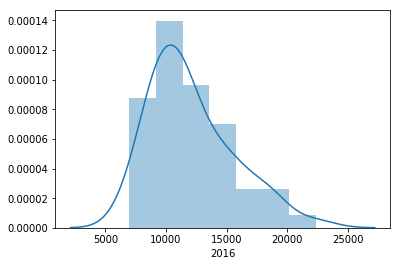

In [92]:
# census spending
print(census_spending.info())
print(census_spending.head())
print(census_spending.describe(percentiles = [.25, .5, .75]))
# other years aren't formatted as numeric currently, so we only have a histogram for 2016.
# Fortunately we can ignore those columns because we have equivalent data from the NCES for those years.
sns.distplot(census_spending['2016'])

In [93]:
print(nces_data.info())
print(nces_data.head())
print(nces_data.describe(percentiles = [.25, .5, .75]))
# there are too many columns to do histograms of all of them.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Columns: 496 entries, SURVYEAR to IMEMBR11
dtypes: float64(40), int64(136), object(320)
memory usage: 3.4+ MB
None
   SURVYEAR  FIPS STABR      STNAME           R1A          R1B          R1C  \
0      2000     1    AL     Alabama  0.000000e+00          0.0  561383148.0   
1      2000     2    AK      Alaska  0.000000e+00          0.0  165155884.0   
2      2000     4    AZ     Arizona  1.854254e+09          0.0          0.0   
3      2000     5    AR    Arkansas  7.151313e+08     539335.0    2035260.0   
4      2000     6    CA  California  1.077698e+10  135328549.0     155954.0   

           R1D       R1E        R1F    ...     MEMBR10  IMEMBR10  MEMBR12  \
0  315490891.0   3224955    1038620    ...         NaN       NaN      NaN   
1   96906676.0     35158      76689    ...         NaN       NaN      NaN   
2   38721543.0   2238548   23657904    ...         NaN       NaN      NaN   
3     253390.0   2296357    26

There seem to be a lot of columns with a majority of null values. I'll remove these, then go through the codebook and determine which columns to keep and which to drop. It may be good to rename the columns to something more descriptive as well.

## Data Preparation



### NCES Dataset

In [94]:
# according to the codebook, ppe15 (per student expenditure) can be calculated by NCE13 / ADA, do this for all rows where ppe15 is missing
nces_data.loc[nces_data['PPE15'].isna(), 'PPE15'] = nces_data.loc[nces_data['PPE15'].isna(), 'NCE13'] / nces_data.loc[nces_data['PPE15'].isna(), 'ADA']
# aggressively drop columns without 800 or more points
nces_data = nces_data.dropna(axis = 'columns', thresh = 800)
columns = ['SURVYEAR', 'STNAME', 'TR', 'STE1', 'TE10', 'TE11', 'PPE15']
nces_data = nces_data.loc[:, columns]
nces_data.info()
nces_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Data columns (total 7 columns):
SURVYEAR    895 non-null int64
STNAME      895 non-null object
TR          895 non-null int64
STE1        895 non-null int64
TE10        895 non-null int64
TE11        895 non-null int64
PPE15       895 non-null float64
dtypes: float64(1), int64(5), object(1)
memory usage: 49.0+ KB


,SURVYEAR,STNAME,TR,STE1,TE10,TE11,PPE15
0,2000,Alabama,4832135204,2577580834,161380979,4935621221,5247.824726
1,2000,Alaska,1359764152,662932281,51927688,1375232700,9148.667475
2,2000,Arizona,5503297425,2605218791,501091665,5588398292,5096.194091
3,2000,Arkansas,2730722477,1447716475,96355591,2628202265,5312.190225
4,2000,California,45078305391,23832969257,1623850268,44459535249,6143.870690


In [95]:
# Codebook of variables I kept
# SURVYEAR year the survey was done
# STNAME   name of the state
# TR       TOTAL REVENUES FROM ALL SOURCES
# STE1     INSTRUCTIONAL EXPENDITURES SUBTOTAL
# TE10     PROPERTY TOTAL (Public elementary and secondary education expenditure on property)
# TE11     TOTAL EXPENDITURES FOR EDUCATION
# PPE15    PER PUPIL EXPENDITURES

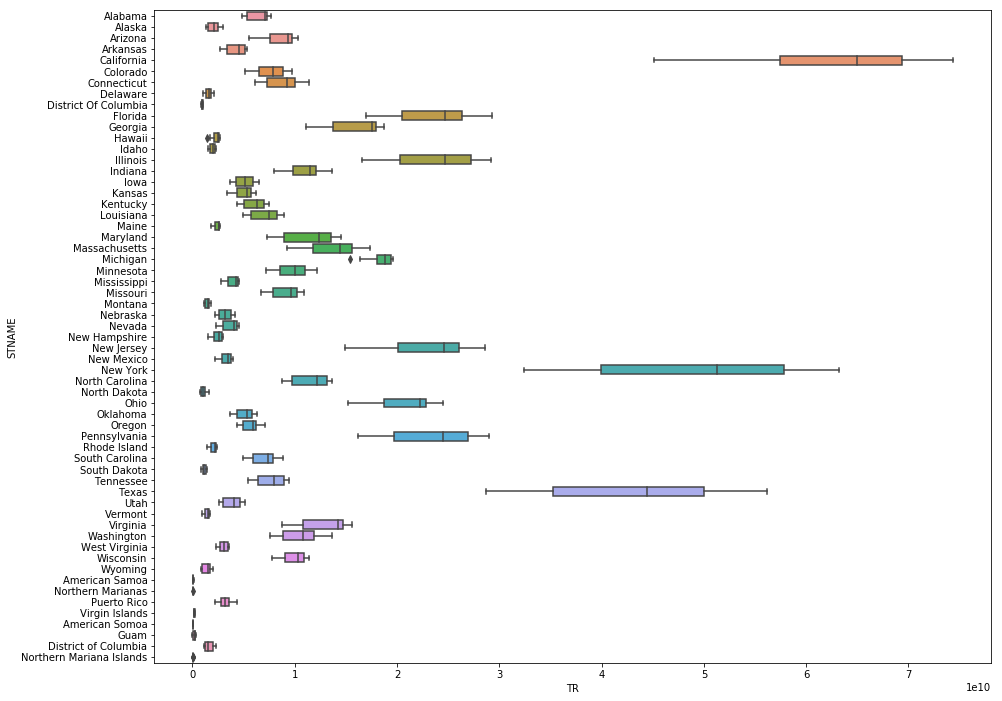

In [96]:
f, ax = plt.subplots(figsize=(15, 12))
sns.boxplot(x = 'TR', y = 'STNAME', data = nces_data)

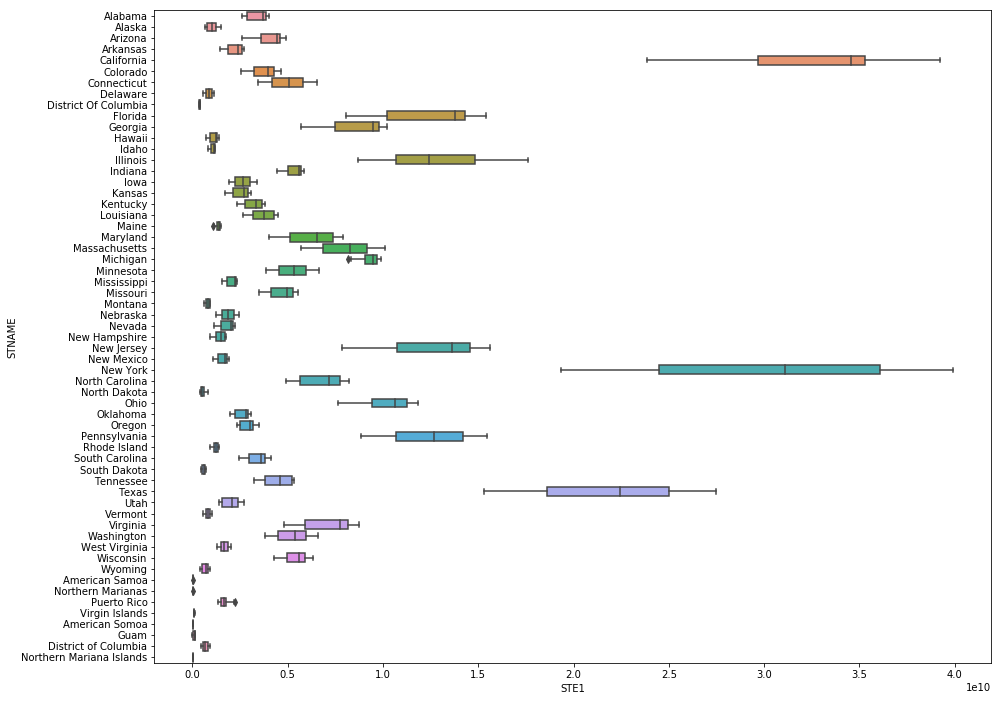

In [97]:
f, ax = plt.subplots(figsize=(15, 12))
sns.boxplot(x = 'STE1', y = 'STNAME', data = nces_data)

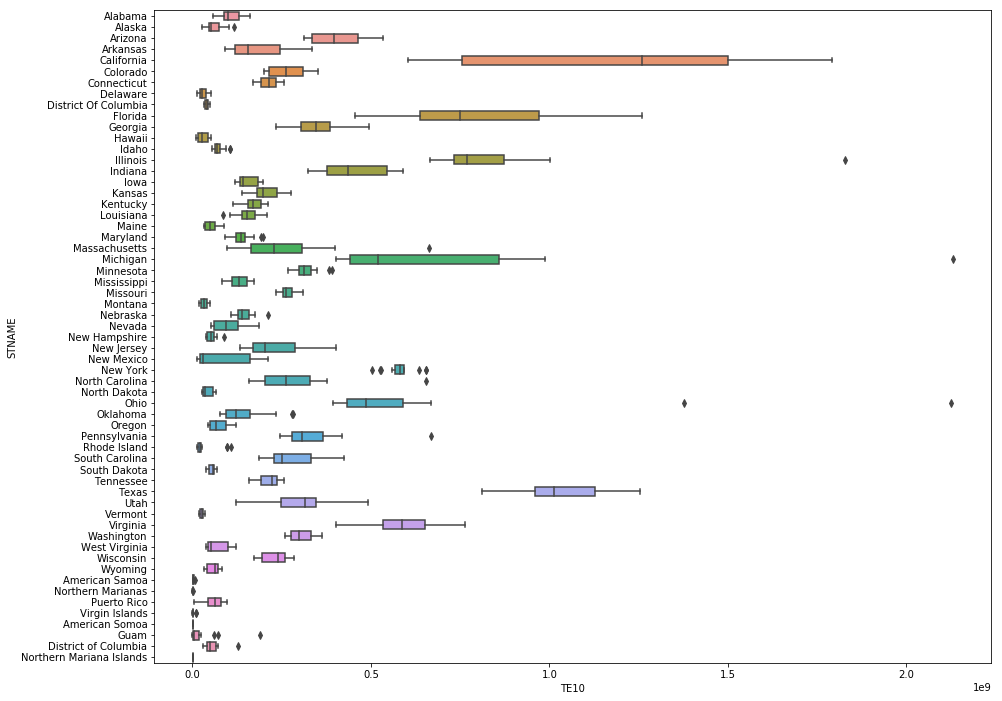

In [98]:
f, ax = plt.subplots(figsize=(15, 12))
sns.boxplot(x = 'TE10', y = 'STNAME', data = nces_data)

We won't remove outliers for TE10 since it represents expenditures on property over the years gathered by the survey. Expenditures could vary based on one-time expenses, so it may be useful to keep these.

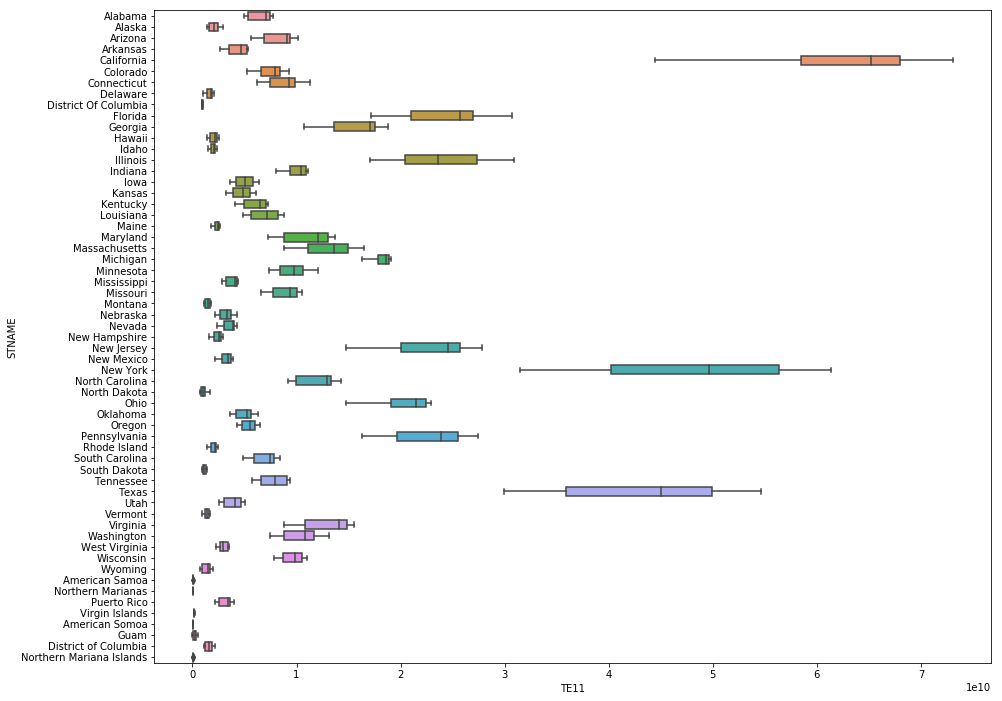

In [99]:
f, ax = plt.subplots(figsize=(15, 12))
sns.boxplot(x = 'TE11', y = 'STNAME', data = nces_data)

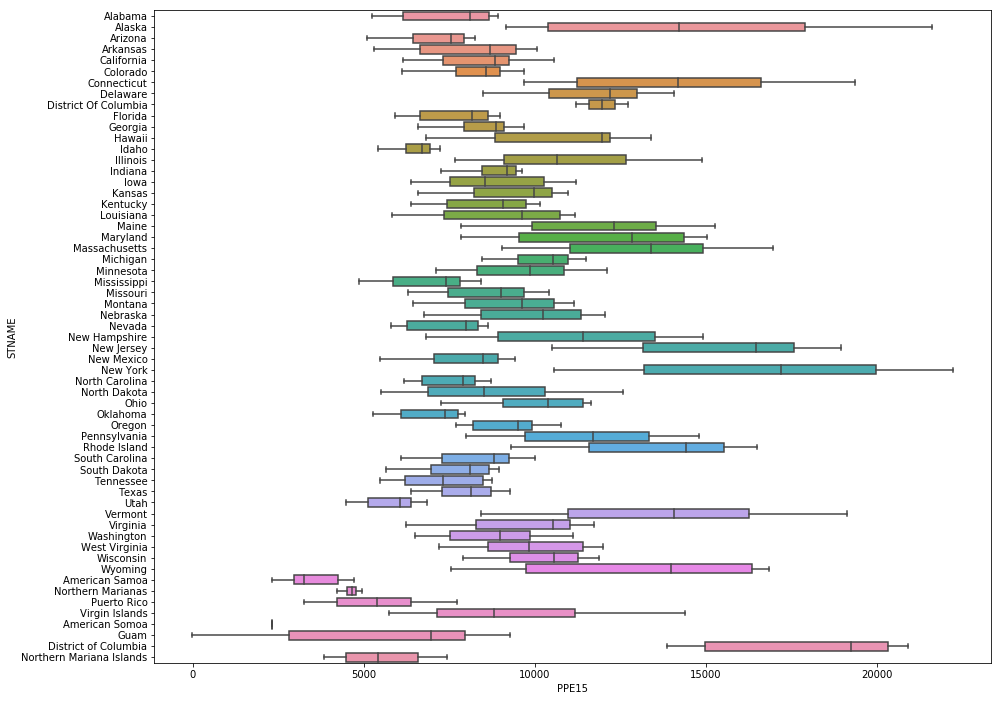

In [100]:
f, ax = plt.subplots(figsize=(15, 12))
sns.boxplot(x = 'PPE15', y = 'STNAME', data = nces_data)

In [101]:
# rename some columns
nces_data = nces_data.rename(str.lower, axis = 'columns')
cols = {'survyear': 'year', 'stname' : 'state', 'tr' : 'total_revenue', 'ste1' : 'instruction_expense',
       'te10' : 'property_expense', 'te11' : 'total_edu_expense', 'ppe15' : 'per_pupil_expense'}
nces_data = nces_data.rename(index = str, columns = cols)
nces_data.columns

Index(['year', 'state', 'total_revenue', 'instruction_expense',
       'property_expense', 'total_edu_expense', 'per_pupil_expense'],
      dtype='object')

In [102]:
nces_data.head()

,year,state,total_revenue,instruction_expense,property_expense,total_edu_expense,per_pupil_expense
0,2000,Alabama,4832135204,2577580834,161380979,4935621221,5247.824726
1,2000,Alaska,1359764152,662932281,51927688,1375232700,9148.667475
2,2000,Arizona,5503297425,2605218791,501091665,5588398292,5096.194091
3,2000,Arkansas,2730722477,1447716475,96355591,2628202265,5312.190225
4,2000,California,45078305391,23832969257,1623850268,44459535249,6143.870690


### Spending Per Pupil via Census

In [103]:
# drop all columns except for 2016 -- we already have data for them from the nces dataset
census_spending = census_spending.loc[:, ['2016', 'State Label']]
census_spending.head()
# melt data
census_spending = pd.melt(census_spending, id_vars=['State Label'], value_vars=['2016'], var_name = 'year', value_name = 'per_pupil_expense')
# drop United States, since we need indicators by sublocation/state, not national
census_spending = census_spending.iloc[1:, :]


In [104]:
# rename columns
census_spending = census_spending.rename(index = str, columns = {'State Label' : 'state'})
census_spending.head()

,state,year,per_pupil_expense
1,Alabama,2016,9236.418059
2,Alaska,2016,17509.975316
3,Arizona,2016,7613.006435
4,Arkansas,2016,9845.568548
5,California,2016,11495.330166


### Adjust for inflation: Set to 2016 dollars

In [105]:
nces_data['total_revenue'] = nces_data.apply(lambda x: cpi.inflate(x.total_revenue, x.year, to = 2016), axis = 1)
nces_data['instruction_expense'] = nces_data.apply(lambda x: cpi.inflate(x.instruction_expense, x.year, to = 2016), axis = 1)
nces_data['property_expense'] = nces_data.apply(lambda x: cpi.inflate(x.property_expense, x.year, to = 2016), axis = 1)
nces_data['total_edu_expense'] = nces_data.apply(lambda x: cpi.inflate(x.total_edu_expense, x.year, to = 2016), axis = 1)
nces_data['per_pupil_expense'] = nces_data.apply(lambda x: cpi.inflate(x.per_pupil_expense, x.year, to = 2016), axis = 1)

### Concatenate 2000-2015 and 2016 datasets together

In [106]:
education_spending = pd.concat([nces_data, census_spending], sort = False).reset_index(drop = True)
print(education_spending.head())
print(education_spending.tail())
education_spending.shape

   year       state  total_revenue  instruction_expense  property_expense  \
0  2000     Alabama   6.734880e+09         3.592552e+09      2.249278e+08   
1  2000      Alaska   1.895197e+09         9.239744e+08      7.237520e+07   
2  2000     Arizona   7.670325e+09         3.631073e+09      6.984060e+08   
3  2000    Arkansas   3.805996e+09         2.017782e+09      1.342974e+08   
4  2000  California   6.282874e+10         3.321765e+10      2.263272e+09   

   total_edu_expense  per_pupil_expense  
0       6.879115e+09        7314.254756  
1       1.916757e+09       12751.127960  
2       7.788936e+09        7102.916696  
3       3.663107e+09        7403.965385  
4       6.196632e+10        8563.135731  
     year          state  total_revenue  instruction_expense  \
941  2016       Virginia            NaN                  NaN   
942  2016     Washington            NaN                  NaN   
943  2016  West Virginia            NaN                  NaN   
944  2016      Wisconsin     

(946, 7)

### Impute missing values for 2016

In [107]:
# linear interpolation by state to try and preserve time trends
education_spending['total_revenue'] = education_spending.groupby('state', as_index = False).transform(pd.DataFrame.interpolate)['total_revenue']
education_spending['instruction_expense'] = education_spending.groupby('state', as_index = False).transform(pd.DataFrame.interpolate)['instruction_expense']
education_spending['property_expense'] = education_spending.groupby('state', as_index = False).transform(pd.DataFrame.interpolate)['property_expense']
education_spending['total_edu_expense'] = education_spending.groupby('state', as_index = False).transform(pd.DataFrame.interpolate)['total_edu_expense']

education_spending.tail()

,year,state,total_revenue,instruction_expense,property_expense,total_edu_expense,per_pupil_expense
941,2016,Virginia,1.532400e+10,8.491608e+09,4.209462e+08,1.521843e+10,11432.343612
942,2016,Washington,1.238199e+10,6.129432e+09,3.018415e+08,1.216379e+10,11534.193195
943,2016,West Virginia,3.717965e+09,2.006685e+09,4.452855e+07,3.545867e+09,11290.521889
944,2016,Wisconsin,1.137297e+10,6.094507e+09,2.537408e+08,1.073674e+10,11456.000448
945,2016,Wyoming,1.734912e+09,8.858258e+08,7.556843e+07,1.729459e+09,16441.980299


In [108]:
# impute missing with median (replaced by linear interpolation method)
# education_spending['total_revenue'] = education_spending.groupby('state', as_index = False).transform(lambda x: x.fillna(x.median()))['total_revenue']
# education_spending['instruction_expense'] = education_spending.groupby('state', as_index = False).transform(lambda x: x.fillna(x.median()))['instruction_expense']
# education_spending['property_expense'] = education_spending.groupby('state', as_index = False).transform(lambda x: x.fillna(x.median()))['property_expense']
# education_spending['total_edu_expense'] = education_spending.groupby('state', as_index = False).transform(lambda x: x.fillna(x.median()))['total_edu_expense']

# education_spending.tail()

## Code Output

In [109]:
# save final prepared dataset to file
education_spending.to_csv('state_edu_spending.csv', index = False)

## Machine Learning Model(s)

Some potential machine learning models that could be used for this problem include the following:
- Logistic Regression Classifier
- Naive Bayes Classifier
- Random Forest Classifier